<a href="https://colab.research.google.com/github/manjeetsrivastava/play-store-app-reveiw-analysis/blob/main/Copy_of_main_google_play_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Exploratory Data Analaysis  on Gogle Play Store

# Importing Libraries and Assigning Alias 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mp
                            


In [5]:
# load google app review data into dataframe
df = pd.read_csv("/content/Play Store Data.csv")
dfr = pd.read_csv("/content/User Reviews.csv")


In [ ]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

In [ ]:
# df.tail() provide us five records data from end 
df.tail()

In [ ]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

In [ ]:
# it gives data about count, mean  
df.describe()

In [ ]:
# look for the random 10 records
df.sample(10)


In [ ]:
# for finding what are the types of Category
df['Category'].unique()

In [ ]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
df['Rating'].mode()


0    4.4
dtype: float64

In [ ]:
df['Rating'].median()

4.3

# Data Cleaning of impure data

In [7]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [ ]:
df.head(1)

In [8]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [ ]:
df.head(1)

In [ ]:
df['Price'].unique()


In [9]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [ ]:
df.sample(10)

In [10]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
df.head(1)

In [ ]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

In [11]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [12]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

In [59]:
df["Rating"].fillna(4.1,inplace = True)


In [ ]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [ ]:
df[df['Content Rating'].isnull()]

In [ ]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [ ]:
print(df['Content Rating'].agg('count'))

In [ ]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# DATA VISUALIZATION

# TOTAL NUMBER OF FREE APPS AND PAID APPS IN OVERALL APPS(APPS DISTRIBUTION)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


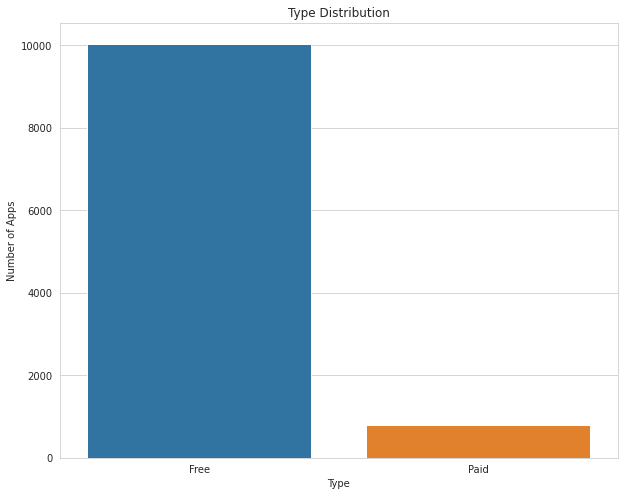

In [151]:
# 1.  application type distribution
plt.figure(figsize=(10, 8))
sns.countplot(df['Type'])

plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

# NUMBER OF APPS INSTALLS IN EACH CATEGORY

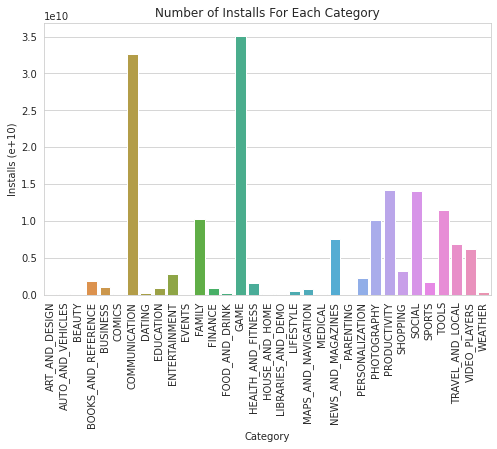

In [150]:
#2.  get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index () # to convert groupby object into dataframe

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

# NUMBER OF FREE AD PAID APPS IN EACH CAEGORY

In [ ]:

df2 = pd.DataFrame().assign(Category=df['Category'], Type = df['Type'],Installs=df['Installs'])
print(df2)

In [ ]:
total1=  df.groupby("Category")['Type' ].count().reset_index()
total1

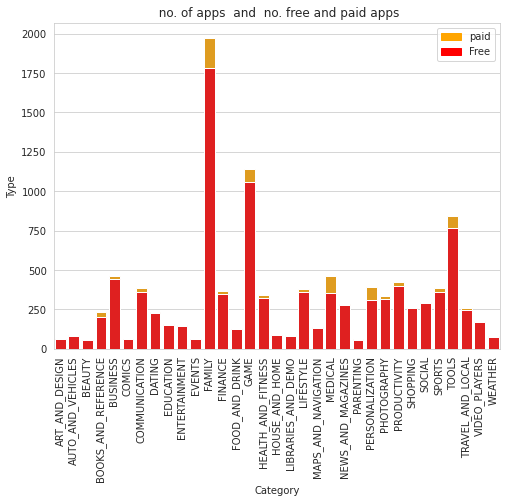

In [149]:
# 3. PLOT BARPLOT FOR FREE AND PAID APPS
sns.set_style("whitegrid")
total=  df.groupby("Category")['Type'].count().reset_index()
plt.figure(figsize = (8,6))
plt.xticks(rotation =90)

# plot chart for the total apps
sns.set_color_codes('pastel')
c1 = sns.barplot(x = "Category", y = "Type",data = total,color = 'orange')

# create a new data frame for paid 

free_apps = df[df.Type == 'Free']
free = free_apps.groupby('Category').count().reset_index()

# bargraph for free apss
c2 = sns.barplot(x = "Category", y = "Type",data = free,color = 'red')
plt.title("  no. of apps  and  no. free and paid apps ")

#ADD LEGEND
top = mp.Patch(color = "orange", label = "paid")
bot = mp.Patch(color = "red" , label = "Free")
plt.legend(handles = [top, bot])



In [ ]:
free_apps = df[df.Type == 'Free']
free =free_apps.groupby('Category').count()['App'].sort_values(ascending = False)


In [ ]:
df4 = pd.DataFrame().assign(Rating=df['Rating'],Installs=df['Installs'])
print(df4)

# NUMBER OF APPS IN EACH CATEGORY

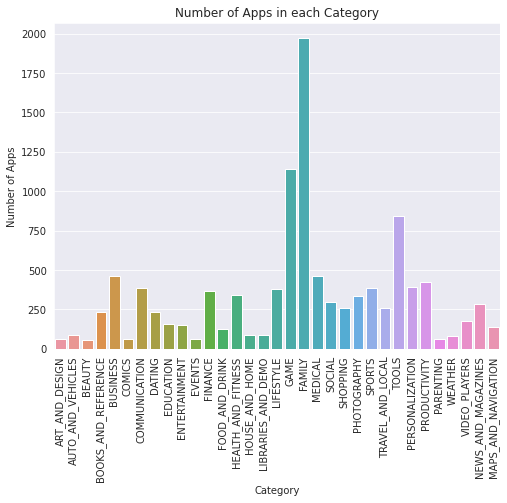

In [146]:

sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps in each Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [142]:
# CORRELATION BETWEEN RATING AND INSTALL
print(df['Rating'].corr(df['Installs']))
print(df['Rating'].corr(df['Size']))
print(df['Rating'].corr(df['Price']))


0.055835348745672066
0.04998834029825421
-0.020835442499074625


# CORELATION BETWEEN RATING,REVIEWS,SIZE AND INSTALLS

In [143]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.071814,0.049988,0.055835,-0.020835
Reviews,0.071814,1.000000,0.065450,0.643121,-0.009668
Size,0.049988,0.065450,1.000000,-0.003468,-0.013464
Installs,0.055835,0.643121,-0.003468,1.000000,-0.011691
Price,-0.020835,-0.009668,-0.013464,-0.011691,1.000000


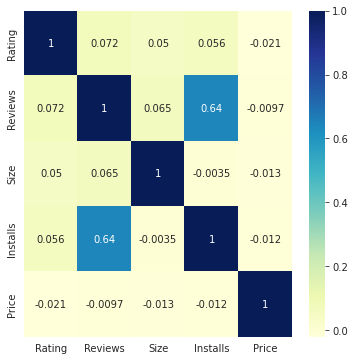

In [144]:
plt.figure(figsize = (6,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
dfy=df.groupby(['Category'])['Rating'].mean()
dfy

## POINT PLOT OF AVERAGE RATING IN EACH CATEGORY

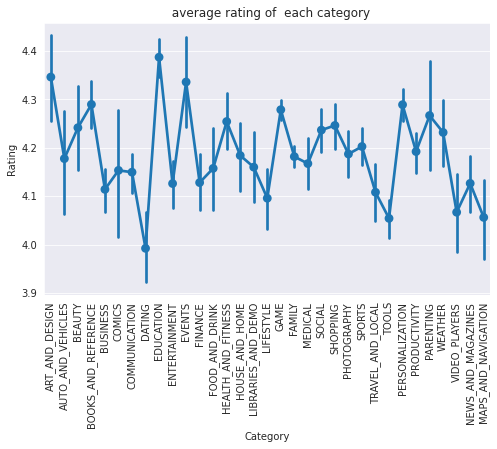

In [140]:
# plot point plot for average rating of each category

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.title("  average rating of  each category")
sns.pointplot(x = "Category", y = "Rating", data = df)

In [133]:




dft = df['Content Rating'].value_counts()
dft


Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# PLOT THE BARGRAPH FOR CONTENT RATING

Text(0.5, 1.0, 'Content Rating')

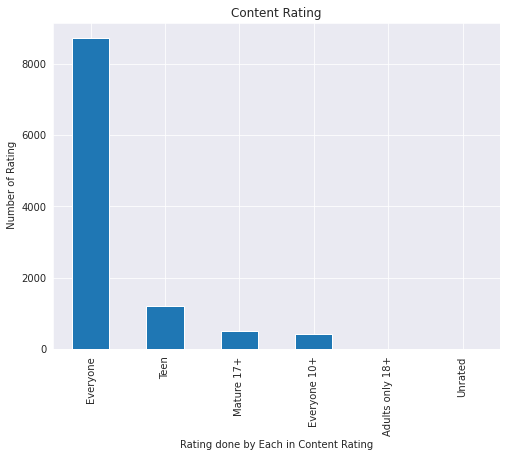

In [138]:
# plot bargraph for  content raing

plt.figure(figsize = (8,6))
dft.plot(kind="bar")
plt.ylabel(" Number of Rating")
plt.xlabel("Rating done by Each in Content Rating")
plt.title("Content Rating")

In [ ]:
dfr.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# PLOTTING THE OVERALL SENTIMENT OF REVIEWS

In [128]:
dfr['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [129]:
#removal of null values in sentiment column
dfr.dropna(subset = ['Sentiment'], inplace = True)

In [130]:
dfr["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [131]:
dfr1 = dfr['Sentiment'].value_counts()
dfr1

Positive    13052
Negative     4617
Neutral      2709
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


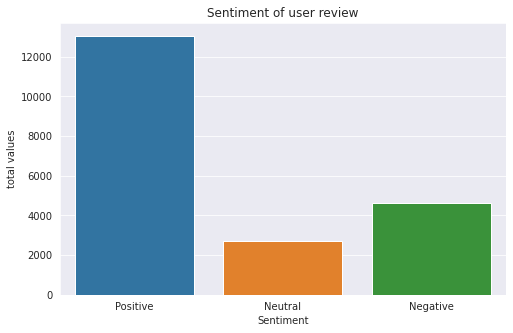

In [132]:
#sentiment of reviews
plt.figure(figsize=(8, 5))
sns.countplot(dfr['Sentiment'])

plt.title('Sentiment of user review')
plt.ylabel('total values')
plt.show()

## Top 10 earning apps

In [68]:
Paid_df= df[df['Type'] == 'Paid']

In [ ]:
earn_df = df[['App', 'Installs', 'Price']]
earn_df

In [70]:
earn_df['Earnings'] = earn_df['Installs'] * earn_df['Price'];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
earn_df_sort_by_Earnings = earn_df.sort_values(by='Earnings', ascending=False).head(50)

In [126]:
earn_df_sort_by_Price = earn_df_sort_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


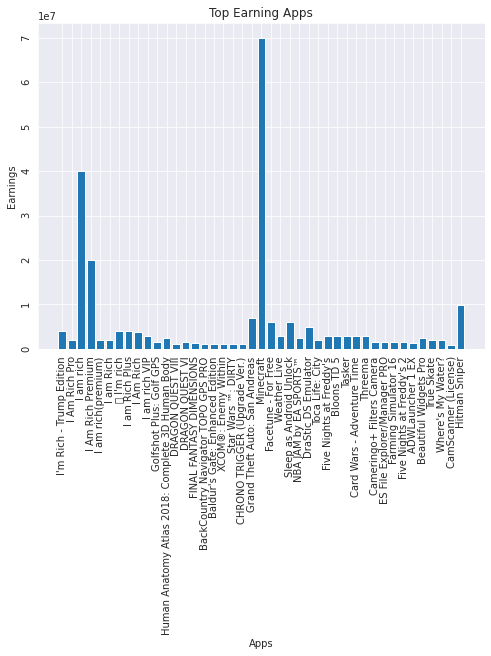

In [127]:
# plot a bar chart for top 5 earning apps
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
plt.bar(earn_df_sort_by_Price.App, earn_df_sort_by_Price.Earnings, label=earn_df_sort_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

here from the above grpah we can easily see that the top 5 earning apps are:-
1)Minecraft
2)I am rich 
3)I am rich (premium)
4)hitman sniper
5)GTA: sandreas


# TOP APPS HAVING HIGHER NUMBER OF REVIEWS

In [121]:
# Apps with higheer numbe rof reviews

high_rev_apps = df.sort_values(by='Reviews', ascending=False).head(50)

In [ ]:
high_rev_apps

Text(0.5, 1.0, ' **top apps having higher no. of reviews**')

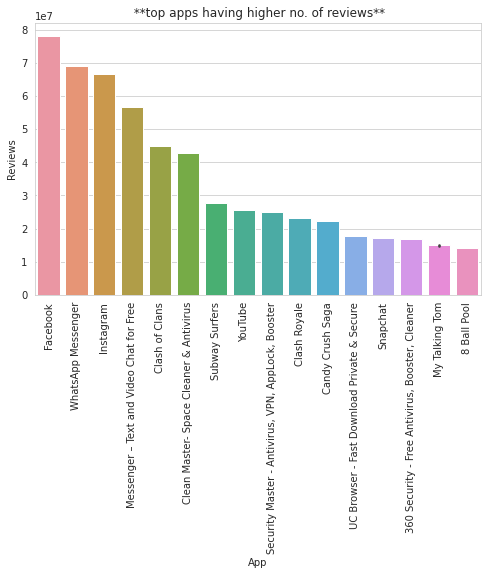

In [124]:
plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
plt.xticks(rotation = 90)
sns.barplot(x = 'App', y = 'Reviews', data = high_rev_apps)
plt.title(" **top apps having higher no. of reviews**")


# top 10 paid apps

In [ ]:
# top ten paid apps 
top_10_paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
top_10_paid_apps

In [119]:
top_10_paid_apps = top_10_paid_apps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


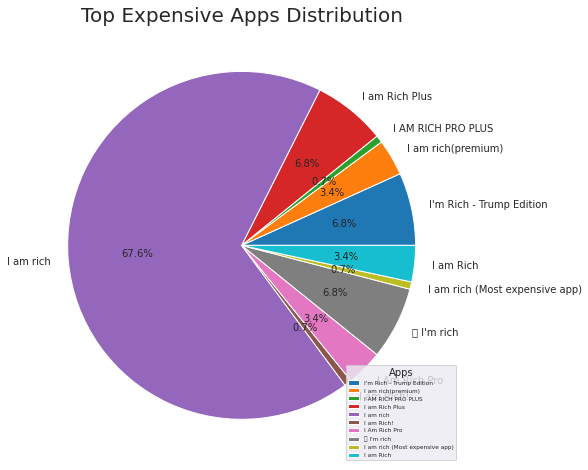

In [120]:
plt.figure(figsize=(9,8));
plt.pie(top_10_paid_apps.Installs, explode=None, labels=top_10_paid_apps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top_10_paid_apps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# TOTAL PRICE IN EACH CATEGORY(SUM)

In [ ]:
# category wise priec:

cat_price = df.groupby('Category')
y=cat_price['Price'].agg(np.sum)
y

Text(0, 0.5, 'Price')

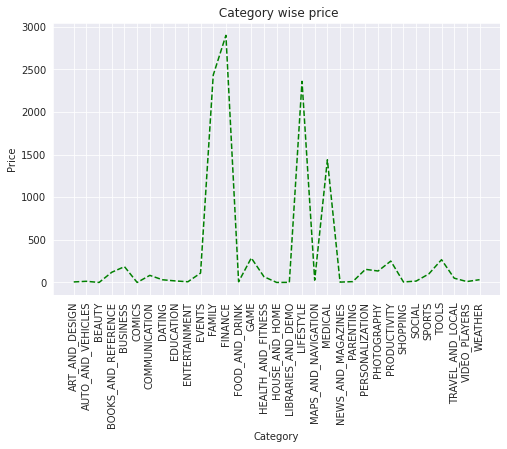

In [117]:
plt.figure(figsize =(8,5))
plt.plot(y,'r--',color = "green")
plt.xticks(rotation = 90)
plt.title(" Category wise price")
plt.xlabel("Category")
plt.ylabel("Price")

from above figure , we see that "finance" Category has high price as compared to others.


# MOST OF THE FALLS UNDER WHICH GENRE

In [ ]:
df['Genres'].unique()

In [ ]:
df['Genres'].value_counts().head(10)

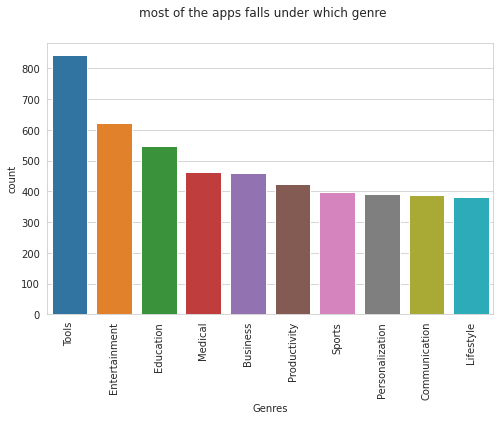

In [ ]:
fig,ax1 = plt.subplots(figsize = (8,5))
plt.suptitle("most of the apps falls under which genre")
plt.xticks(rotation = 90)
sns.countplot( x  = "Genres",data = df,ax = ax1, order = df['Genres'].value_counts().head(10).index)
plt.show()

Here from the above example we saw that most of the apps belongs to "Tools" Genres 

In [ ]:
dfu = df[ df['Reviews'] > 50000].sort_values(by='Reviews')
dfu

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41.0,1.000000e+06,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
9677,Masha and The Bear Jam Day Match 3 games for kids,FAMILY,4.6,50060.0,98.0,1.000000e+06,Free,0.0,Everyone,Puzzle;Brain Games,"August 7, 2018",1.4.83,4.1 and up
8294,Bokeh (Background defocus),PHOTOGRAPHY,4.0,50109.0,0.0,1.000000e+07,Free,0.0,Everyone,Photography,"June 7, 2018",Varies with device,Varies with device
3098,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
3046,Fantasy Football,SPORTS,3.5,50179.0,23.0,1.000000e+06,Free,0.0,Everyone,Sports,"August 2, 2018",2.5.7.1,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


# **what is the average size of the free apps & paid apps (in mb)**

In [ ]:
df.groupby('Type')['Size'].mean()

Type
Free    18.207730
Paid    17.472417
Name: Size, dtype: float64

Text(0.5, 0, 'TYPE')

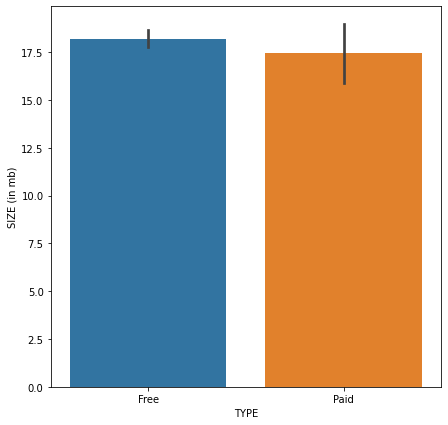

In [44]:
plt.figure(figsize = (7,7))
sns.barplot(x='Type', y='Size', data=df,estimator=np.mean)
plt.ylabel("SIZE (in mb)")
plt.xlabel("TYPE")

# which category getting Highest Avg Rating

In [ ]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=True)


# countplot of rating(top 10)

In [ ]:
df["Rating"].unique()

In [ ]:
df['Rating'].value_counts().head(10)

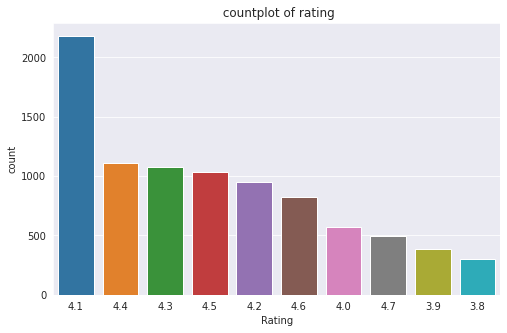

In [111]:
fig,ax2 = plt.subplots(figsize = (8,5))
sns.set_style("darkgrid")
plt.title(" countplot of rating")
sns.countplot(x = "Rating",data = df,ax = ax2, order = df["Rating"].value_counts().head(10).index)
plt.show()

# data Shape

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10839.000000,1.083900e+04,10839.000000,1.083900e+04,10839.000000
mean,4.179288,4.441939e+05,18.153458,1.546577e+07,1.027463
std,0.479960,2.927893e+06,22.171186,8.503315e+07,15.950436
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000,3.000000e+03,0.000000
50%,4.200000,2.094000e+03,9.200000,1.000000e+05,0.000000
75%,4.500000,5.478300e+04,26.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


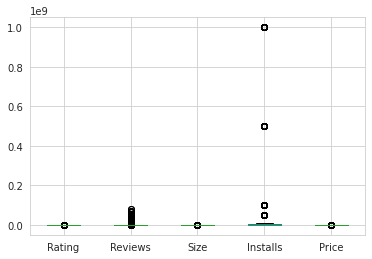

In [ ]:
df.boxplot()

#which App have max Review

In [ ]:
df['Reviews'].max()

78158306.0

In [ ]:
df[df['Reviews'].max()==df['Reviews']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,0.0,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


# correlation b/w size and nuber of installed app

In [ ]:
df.loc[0:10842,['Size','Installs']]

,Size,Installs
0,19.0,10000.0
1,14.0,500000.0
2,8.7,5000000.0
3,25.0,50000000.0
4,2.8,100000.0
...,...,...
10836,53.0,5000.0
10837,3.6,100.0
10838,9.5,1000.0
10839,0.0,1000.0


In [ ]:
print(df['Size'].corr(df['Installs']))

-0.00346790732976557


# Year wise App Installation

Text(0.5, 0, 'Last Updated')

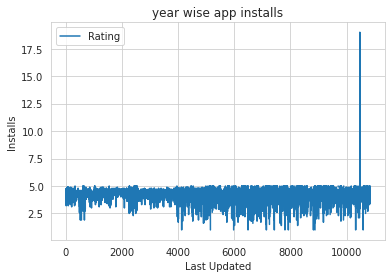

In [ ]:
df.plot()

plt.title('year wise app installs')
plt.ylabel('Installs')
plt.xlabel('Last Updated')

# TOP 10 INSTALLED APP IN SPORTS CATEGORY

In [106]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(8,8))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right');

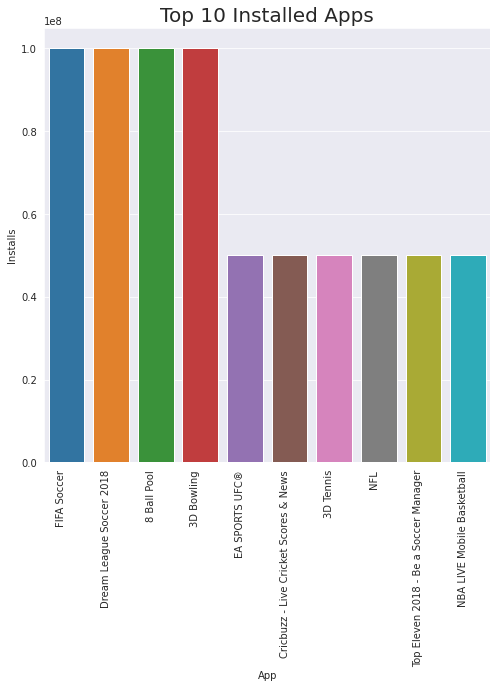

In [107]:
# bargraph for  top 10 installed apps in sports category
findtop10incategory('Sports')

# DISTRIBUTION OF RATING

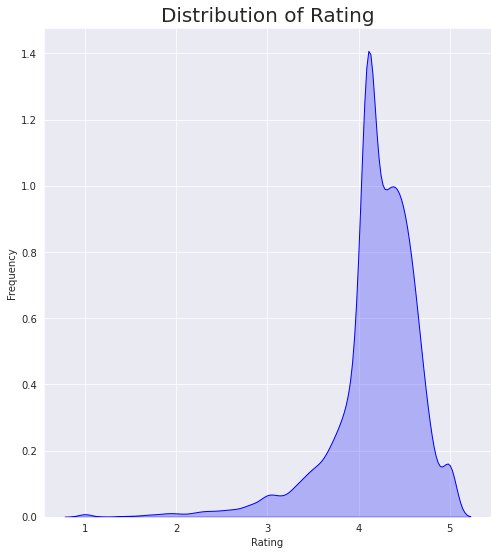

In [110]:
plt.figure(figsize=(8,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

#  Distribution of INSTALLS OF FREE APP

In [31]:
df = df[df['Installs'] != 'Free']

In [32]:
all_free = df[df['Type'] == 'Free']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (free apps)')]

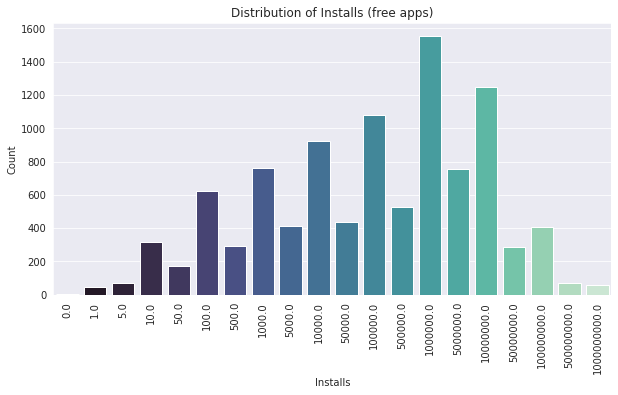

In [105]:
free_counts = pd.DataFrame(all_free['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=free_counts.index, y=free_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (free apps)')

# DISTRIBUTION OF PAID APPS 

In [37]:
all_paid = df[df['Type'] == 'Paid']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (paid apps)')]

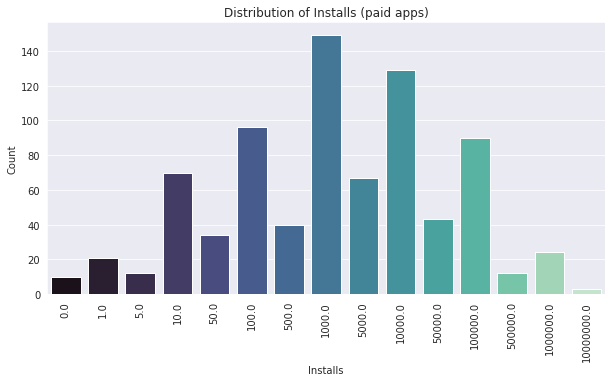

In [104]:
paid_counts = pd.DataFrame(all_paid['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=paid_counts.index, y=paid_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (paid apps)')

# Ratio of Free and Paid Apps

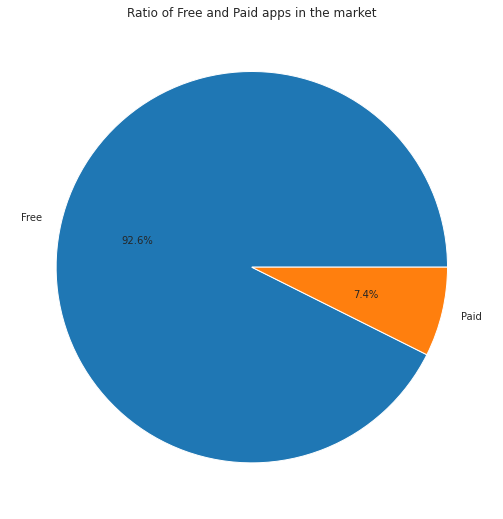

In [101]:
df.Type.value_counts().plot.pie(y = df.Type, figsize = (9,9), autopct = '%1.1f%%', title = 'Ratio of Free and Paid apps in the market',label = '');

# Average Game vs. Apps Ratings

In [ ]:
appdf = df[df.Category!='GAME']

In [ ]:
gamedf = df[df.Category=='GAME']

In [ ]:
appsrating = appdf.Rating.mean()
gamerating = gamedf.Rating.mean()
print('the overall rating of game is {:.2f} .'.format(gamerating))
print('the overall rating of apps is {:.2f} .'.format(appsrating))

the overall rating of game is 4.29 .
the overall rating of apps is 4.18 .


# AVERAGE PRICE OF PAID APPS IN EACH CATEGORY

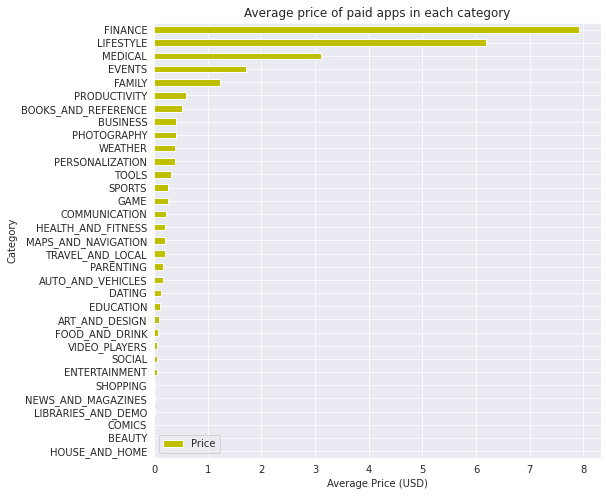

In [97]:

df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (8,8), color='y').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()

# PLOTTING OF POSITIVE REVIEWS

In [16]:

positive_reviews_df = dfr[dfr['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
34956,DisneyNOW – TV Shows & Games,I love app. I get favorite shows movies I shar...,Positive,0.476562,0.600000
34959,DisneyNOW – TV Shows & Games,I really like YOU alot I find shows kids I fin...,Positive,0.431250,0.550000
34960,DisneyNOW – TV Shows & Games,It's great except I complaint: Most episodes l...,Positive,0.333333,0.483333
34961,DisneyNOW – TV Shows & Games,used work great. Then started would open would...,Positive,0.018750,0.541667


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

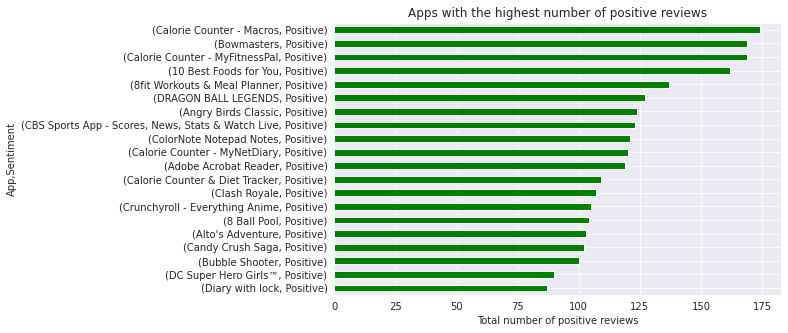

In [94]:

positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='green').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

# PLOTTING OF NEGATIVE REVIEWS

In [24]:
negative_reviews_df = dfr[dfr['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
34935,DisneyNOW – TV Shows & Games,Terrible! I years first time giving trouble. I...,Negative,-0.316667,0.511111
34937,DisneyNOW – TV Shows & Games,Well awsome really helpful I try play video sa...,Negative,-0.112500,0.412500
34942,DisneyNOW – TV Shows & Games,It many ads glitches every time gets annoyed. ...,Negative,-0.180000,0.710000
34943,DisneyNOW – TV Shows & Games,"It's alright-ish, keeps freezing up. The NickJ...",Negative,-0.027778,0.777778


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

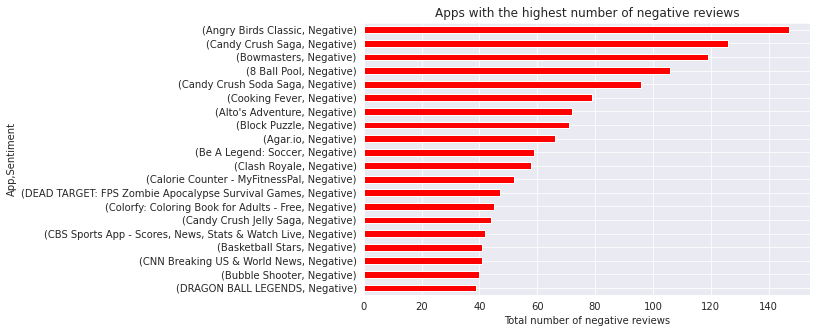

In [93]:
#plotting of negative reviews
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(8,5), color='red').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

# WORD CLOUD FOR POSITIVE REVIEWS

In [28]:
from wordcloud import WordCloud, STOPWORDS

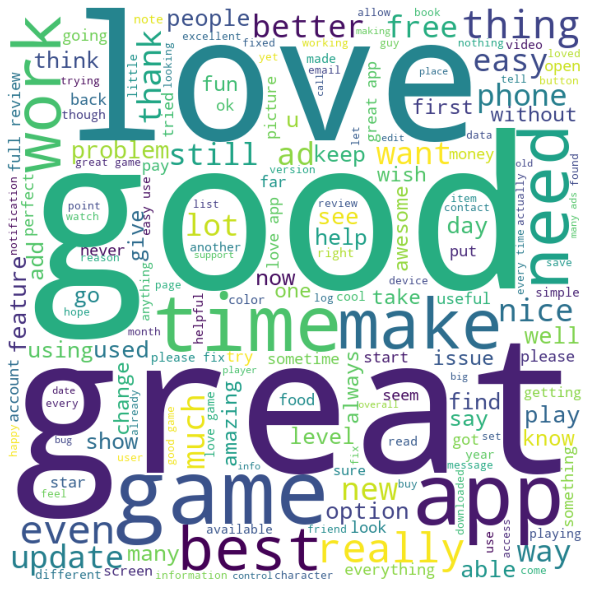

In [91]:
review_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    review_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)